In [13]:
# Load the data
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download('aapl','2022-02-02','2024-02-02')# Replace with your data file
data = data[['Adj Close']]  # Use the 'Close' price for prediction

data['Date']=data.index.to_list()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

[*********************100%%**********************]  1 of 1 completed
/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_45343/3457005901.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date']=data.index.to_list()
/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_45343/3457005901.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

341/341 [==============================] - 6s 11ms/step - loss: 0.0122


2/2 [==============================] - 0s 6ms/step


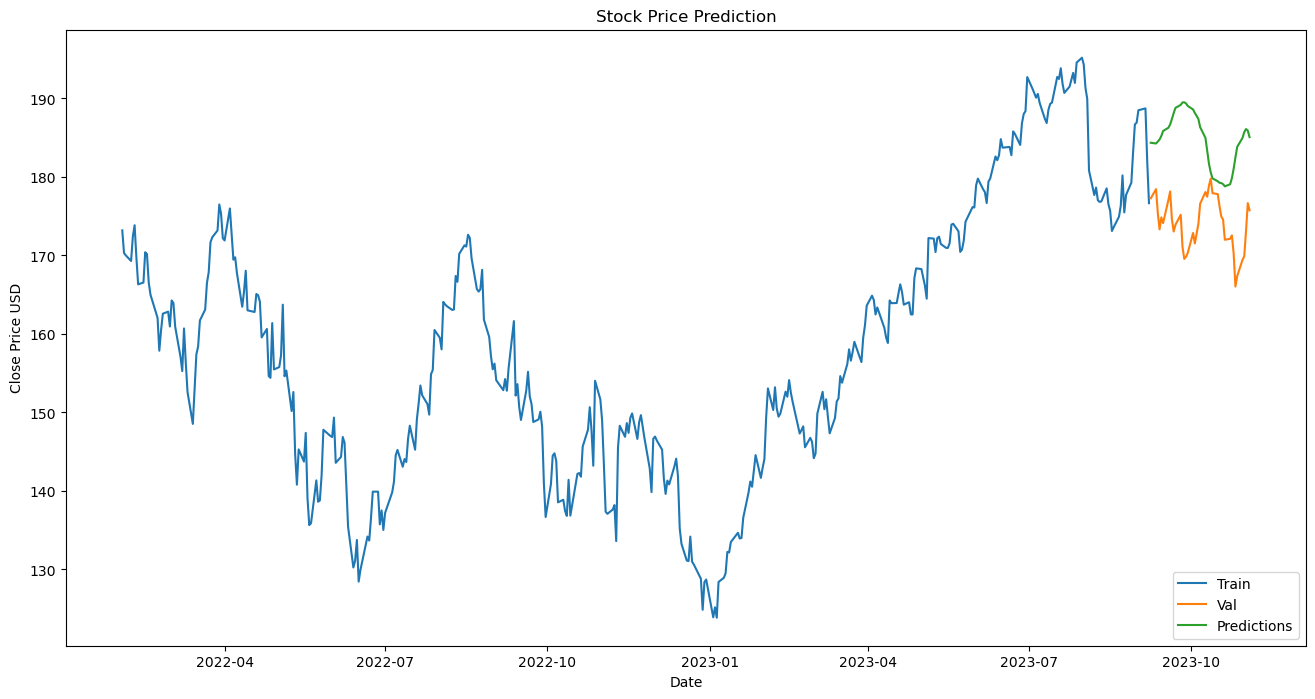

In [18]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Plot the results
train = data[:train_size]
valid = data[train_size:]

# Ensure predictions have the same length as the validation set
valid = valid.iloc[:len(predictions)]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

[*********************100%%**********************]  1 of 1 completed
/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_45343/3336116044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data.index)


1/1 [==============================] - 0s 16ms/step


/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_45343/3336116044.py:90: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_days + 1, closed='right')


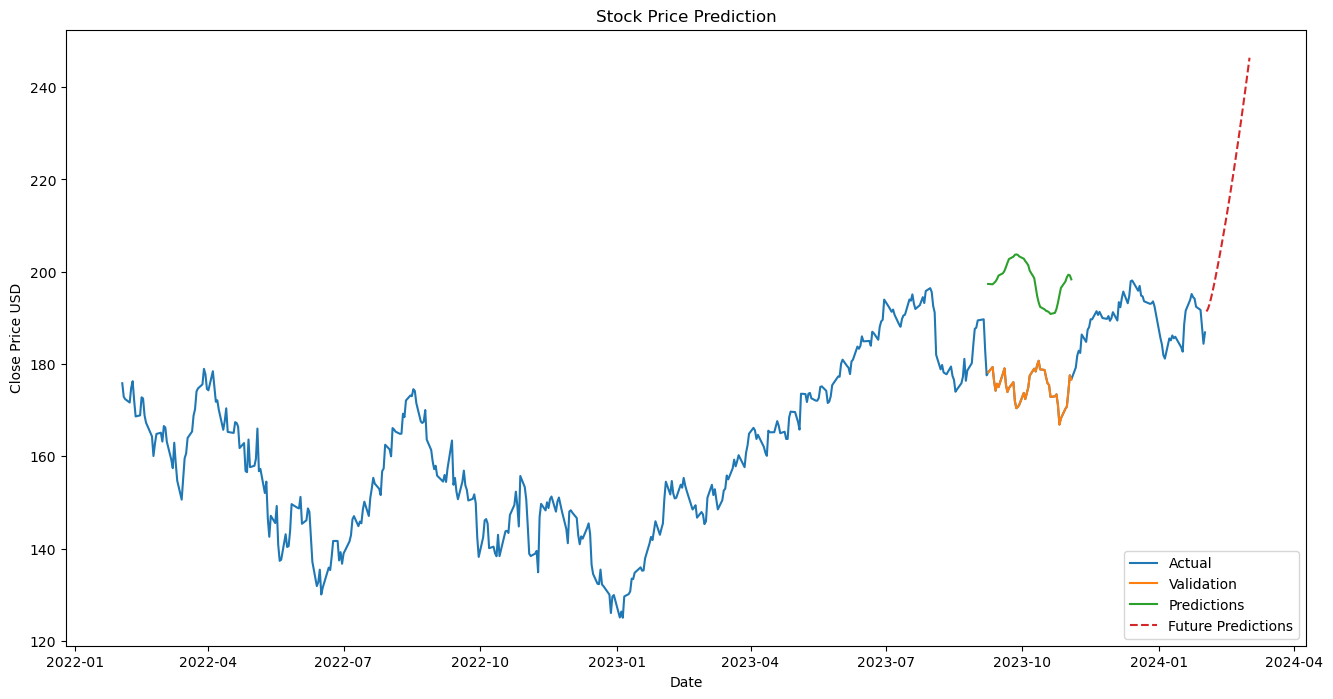

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

# Load the data
data = yf.download('AAPL', '2022-02-02', '2024-02-02')
data = data[['Close']]  # Use the 'Close' price for prediction
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create a neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the historical data
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Plot the results
train = data[:train_size]
valid = data[train_size:]

# Ensure predictions have the same length as the validation set
valid = valid.iloc[:len(predictions)]
valid['Predictions'] = predictions

# Get the last sequence from the training data
last_sequence = train_data[-seq_length:]

# Number of future days to predict
future_days = 30

# Initialize the list to store future predictions
future_predictions = []

# Use the last sequence to start predicting future values
current_sequence = last_sequence

for _ in range(future_days):
    # Reshape the current sequence to match the model input shape
    current_sequence_reshaped = current_sequence.reshape((1, seq_length, 1))
    
    # Predict the next value
    next_value = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the future predictions list
    future_predictions.append(next_value[0, 0])
    
    # Update the current sequence by removing the first value and adding the predicted value
    current_sequence = np.append(current_sequence[1:], next_value, axis=0)

# Inverse transform the future predictions to get actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Extend the date index
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1, closed='right')

# Create a DataFrame for future predictions
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predictions'])

# Plot the results
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(data['Close'], label='Actual')
plt.plot(valid['Close'], label='Validation')
plt.plot(valid['Predictions'], label='Predictions')
plt.plot(future_df['Predictions'], label='Future Predictions', linestyle='dashed')
plt.legend(loc='lower right')
plt.show()

[*********************100%%**********************]  1 of 1 completed
/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_45586/2015097565.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data.index)


1/1 [==============================] - 0s 18ms/step


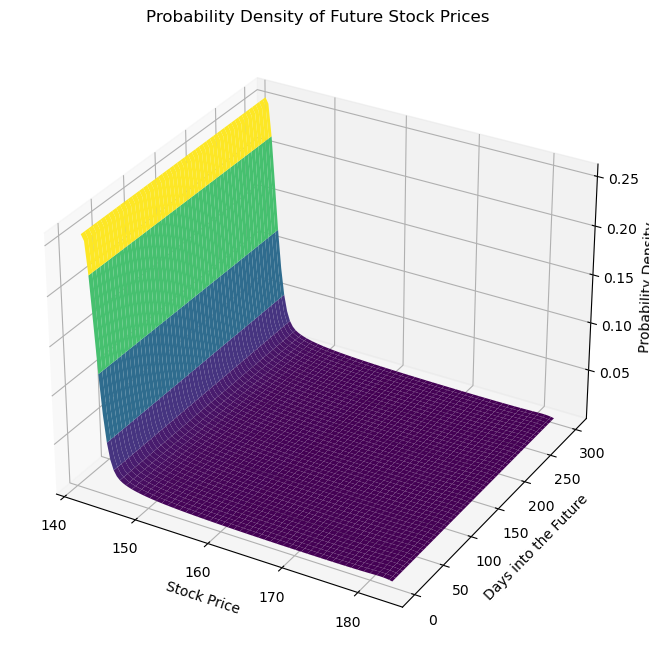

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = yf.download('AAPL', '2022-02-02', '2024-02-02')
data = data[['Close']]  # Use the 'Close' price for prediction
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create a neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the historical data
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Get the last sequence from the training data
last_sequence = train_data[-seq_length:]

# Number of future days to predict
future_days = 300

# Generate multiple future predictions to create a distribution
num_simulations = 100
all_predictions = []

for _ in range(num_simulations):
    current_sequence = last_sequence
    future_predictions = []
    for _ in range(future_days):
        current_sequence_reshaped = current_sequence.reshape((1, seq_length, 1))
        next_value = model.predict(current_sequence_reshaped)
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value, axis=0)
    all_predictions.append(future_predictions)

all_predictions = np.array(all_predictions)
all_predictions = scaler.inverse_transform(all_predictions)

# Flatten the predictions to estimate the PDF
flattened_predictions = all_predictions.flatten()

# Estimate the PDF using Gaussian Kernel Density Estimation
kde = gaussian_kde(flattened_predictions)

# Create a grid of points for the 3D plot
x = np.linspace(min(flattened_predictions), max(flattened_predictions), 100)
y = np.linspace(1, future_days, future_days)
X, Y = np.meshgrid(x, y)

# Evaluate the PDF on the grid
Z = np.array([kde(x) for x in X])

# Create a 3D plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('Probability Density of Future Stock Prices')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Days into the Future')
ax.set_zlabel('Probability Density')

plt.show()

[*********************100%%**********************]  1 of 1 completed
/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_45586/127047935.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data.index)


1/1 [==============================] - 0s 16ms/step


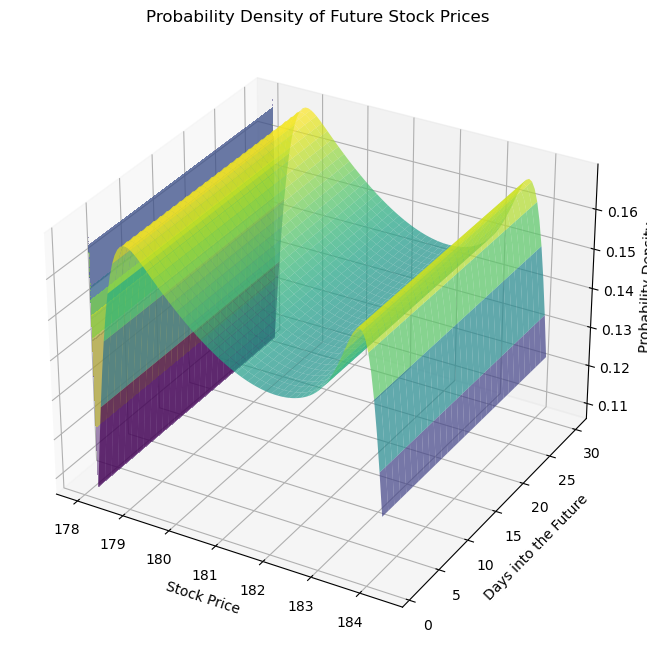

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = yf.download('AAPL', '2022-02-02', '2024-02-02')
data = data[['Close']]  # Use the 'Close' price for prediction
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create a neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the historical data
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Get the last sequence from the training data
last_sequence = train_data[-seq_length:]

# Number of future days to predict
future_days = 30

# Generate multiple future predictions to create a distribution
num_simulations = 100
all_predictions = []

for _ in range(num_simulations):
    current_sequence = last_sequence
    future_predictions = []
    for _ in range(future_days):
        current_sequence_reshaped = current_sequence.reshape((1, seq_length, 1))
        next_value = model.predict(current_sequence_reshaped)
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value, axis=0)
    all_predictions.append(future_predictions)

all_predictions = np.array(all_predictions)
all_predictions = scaler.inverse_transform(all_predictions)

# Flatten the predictions to estimate the PDF
flattened_predictions = all_predictions.flatten()

# Estimate the PDF using Gaussian Kernel Density Estimation
kde = gaussian_kde(flattened_predictions)

# Create a grid of points for the 3D plot
x = np.linspace(min(flattened_predictions), max(flattened_predictions), 100)
y = np.linspace(1, future_days, future_days)
X, Y = np.meshgrid(x, y)

# Evaluate the PDF on the grid
Z = np.array([kde(x) for x in X])

# Create a 3D plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Add contour plot
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')

# Add density plot
ax.contourf(X, Y, Z, zdir='x', offset=min(flattened_predictions), cmap='viridis', alpha=0.5)
ax.contourf(X, Y, Z, zdir='y', offset=future_days, cmap='viridis', alpha=0.5)

ax.set_title('Probability Density of Future Stock Prices')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Days into the Future')
ax.set_zlabel('Probability Density')

plt.show()

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = yf.download('AAPL', '2022-02-02', '2024-02-02')
data = data[['Close']]  # Use the 'Close' price for prediction
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Adjusted model with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(100, return_sequences=False),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the historical data with more epochs and larger batch size
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Get the last sequence from the training data
last_sequence = train_data[-seq_length:]

# Number of future days to predict
future_days = 300

# Generate multiple future predictions to create a distribution
num_simulations = 500
all_predictions = []

for _ in range(num_simulations):
    current_sequence = last_sequence
    future_predictions = []
    for _ in range(future_days):
        current_sequence_reshaped = current_sequence.reshape((1, seq_length, 1))
        next_value = model.predict(current_sequence_reshaped)
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value, axis=0)
    all_predictions.append(future_predictions)

all_predictions = np.array(all_predictions)
all_predictions = scaler.inverse_transform(all_predictions)

# Flatten the predictions to estimate the PDF
flattened_predictions = all_predictions.flatten()

# Estimate the PDF using Gaussian Kernel Density Estimation
kde = gaussian_kde(flattened_predictions)

# Create a grid of points for the 3D plot
x = np.linspace(min(flattened_predictions), max(flattened_predictions), 100)
y = np.linspace(1, future_days, future_days)
X, Y = np.meshgrid(x, y)

# Evaluate the PDF on the grid
Z = np.array([kde(x) for x in X])

# Create a 3D plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Add contour plot
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')

# Add density plot
ax.contourf(X, Y, Z, zdir='x', offset=min(flattened_predictions), cmap='viridis', alpha=0.5)
ax.contourf(X, Y, Z, zdir='y', offset=future_days, cmap='viridis', alpha=0.5)

ax.set_title('Probability Density of Future Stock Prices')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Days into the Future')
ax.set_zlabel('Probability Density')

plt.show()

[*********************100%%**********************]  1 of 1 completed
/var/folders/mk/fn7b709x3dz4m442ngj1_xf00000gn/T/ipykernel_46720/533844640.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data.index)


Epoch 1/20
11/11 [==============================] - 3s 79ms/step - loss: 0.0675
Epoch 2/20
11/11 [==============================] - 1s 80ms/step - loss: 0.0190
Epoch 3/20
11/11 [==============================] - 1s 85ms/step - loss: 0.0131
Epoch 4/20
11/11 [==============================] - 1s 93ms/step - loss: 0.0096
Epoch 5/20
11/11 [==============================] - 1s 93ms/step - loss: 0.0082
Epoch 6/20
11/11 [==============================] - 1s 117ms/step - loss: 0.0075
Epoch 7/20
11/11 [==============================] - 2s 141ms/step - loss: 0.0070
Epoch 8/20
11/11 [==============================] - 3s 228ms/step - loss: 0.0066
Epoch 9/20
11/11 [==============================] - 2s 202ms/step - loss: 0.0064
Epoch 10/20
11/11 [==============================] - 2s 167ms/step - loss: 0.0065
Epoch 11/20
11/11 [==============================] - 1s 87ms/step - loss: 0.0065
Epoch 12/20
11/11 [==============================] - 1s 86ms/step - loss: 0.0061
Epoch 13/20
11/11 [=============